In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [8]:
# Cargamos el conjunto de datos

iris=pd.read_csv('iris.csv')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# Preparamos los datos para el entrenamiento

y=iris['species']

X = iris.drop('species', axis=1)

y.unique()

encoder = LabelBinarizer()
y=encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train) # Solo en entrenamiento para no incluir datos del test

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Diseño del modelo

model = Sequential()
model.add(Dense(4, activation='relu', input_shape=[4,]))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(patience=10, monitor='val_loss')

model.fit(X_train_scaled, y_train, epochs=500, callbacks=[early_stopping], validation_data=(X_test_scaled, y_test))

Epoch 1/500


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.3444 - loss: 0.9576 - val_accuracy: 0.2889 - val_loss: 0.9679
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3569 - loss: 0.9528 - val_accuracy: 0.3333 - val_loss: 0.9640
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3601 - loss: 0.9486 - val_accuracy: 0.3333 - val_loss: 0.9602
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3569 - loss: 0.9439 - val_accuracy: 0.3333 - val_loss: 0.9565
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3611 - loss: 0.9365 - val_accuracy: 0.3333 - val_loss: 0.9527
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3472 - loss: 0.9340 - val_accuracy: 0.3333 - val_loss: 0.9489
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3621 - loss: 0.9320 - val_accuracy: 0.3333 - val_loss: 0.9452
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3933 - loss: 0.9268 - val_accuracy: 0.3111 - val_loss: 0.9417
Epo

<Axes: >

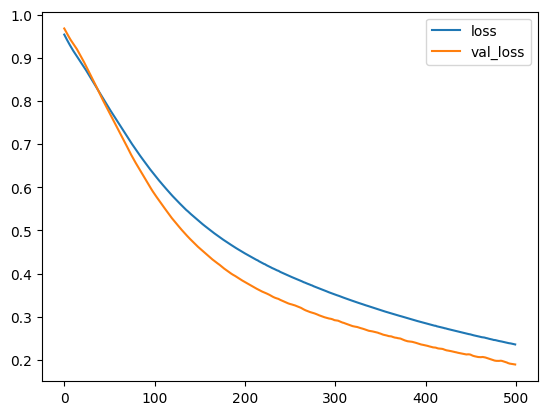

In [11]:
metrics = pd.DataFrame(model.history.history)

metrics[['loss', 'val_loss']].plot()

<Axes: >

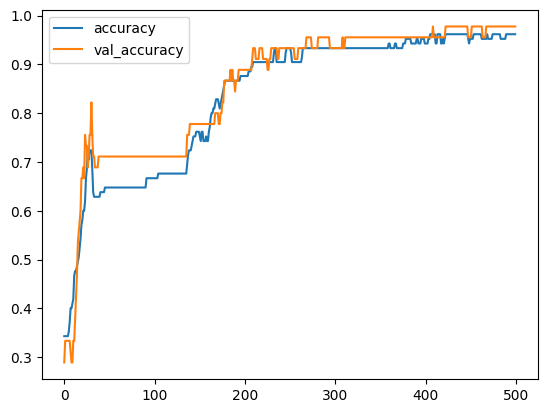

In [12]:
metrics[['accuracy', 'val_accuracy']].plot()

In [13]:
model.evaluate(X_test_scaled, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9748 - loss: 0.1909


[0.18939308822155, 0.9777777791023254]

In [ ]:
# Nuevo modelo para deployment

Scaled_X = scaler.fit_transform(X)

model = Sequential()
model.add(Dense(4, activation='relu', input_shape=[4,]))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(patience=10, monitor='val_loss')

model.fit(X_train_scaled, y_train, epochs=500, callbacks=[early_stopping], validation_data=(X_test_scaled, y_test))

Epoch 1/500


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.3274 - loss: 1.0709 - val_accuracy: 0.2889 - val_loss: 1.0802
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3337 - loss: 1.0609 - val_accuracy: 0.2889 - val_loss: 1.0737
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3368 - loss: 1.0565 - val_accuracy: 0.2889 - val_loss: 1.0674
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3333 - loss: 1.0515 - val_accuracy: 0.3111 - val_loss: 1.0612
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3541 - loss: 1.0462 - val_accuracy: 0.2889 - val_loss: 1.0554
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3555 - loss: 1.0359 - val_accuracy: 0.2889 - val_loss: 1.0498
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3451 - loss: 1.0321 - val_accuracy: 0.2889 - val_loss: 1.0444
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3389 - loss: 1.0317 - val_accuracy: 0.2889 - val_loss: 1.0390
Epoc

In [ ]:
# Salvamos el modelo

model.save('iris_model.h5')

import joblib

joblib.dump(scaler, 'iris_scaler.pkl')

In [ ]:
from tensorflow.keras.models import load_model

model_pretrained = load_model('iris_model.h5')
scaler_prefitted = joblib.load('iris_scaler.pkl')

flower_example = {'sepal_length': 5.1, 'sepal_width': 3.5, 'petal_length': 1.4, 'petal_width': 0.2}


In [ ]:
encoder.classes_

In [ ]:
# Función para obtener la predicción del modelo

def return_prediction(model, scaler, sample_json):
  s_len=sample_json['sepal_length']
  s_wid=sample_json['sepal_width']
  p_len=sample_json['petal_length']
  p_wid=sample_json['petal_width']

  flower=[[s_len, s_wid, p_len, p_wid]]

  classes=np.array(['setosa', 'versicolor', 'virginica'])

  flower=scaler.transform(flower)

  class_ind=model.predict(flower)
  class_ind=classes[np.argmax(class_ind)]

  return class_ind

return_prediction(model_pretrained, scaler_prefitted, flower_example)